In [4]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Unnamed: 0,wav_path,label,target
0,0,train/c/1c306fb.wav,music,1
1,1,train/e/3480542.wav,speech,0
2,2,train/3/431313a.wav,noise,2
3,3,train/a/7856ac7.wav,music,1
4,4,train/6/be92480.wav,noise,2


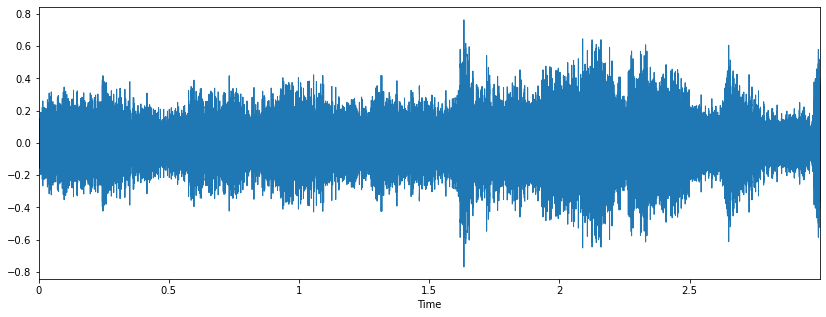

In [5]:
path = train_df.iloc[3].wav_path
x, sr = librosa.load(path, sr=16000)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

(32.0, 23072.0, 0.0, 1.0)

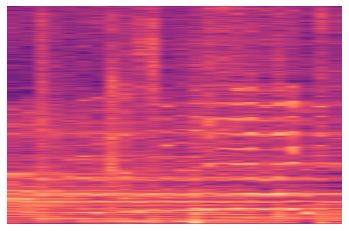

In [6]:
cmap = plt.get_cmap('magma')
plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
plt.axis('off')

## Извлечение признаков
- Спектральный центроид (spectral centroid)
- Спектральный спад (rollof)
- Спектральная ширина (spectral bandwidth)
- Скорость пересечения нуля (zero crossing rate)
- Мел-частотные кепстральные коэффициенты (MFCC)
- Цветность (chroma_stft)

In [ ]:
header = 'chroma_stft rms spec_cent spec_bw rolloff zcr'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()

In [ ]:
my_train_df = train_df.copy()
size = train_df.shape[0]
for h in header:
    my_train_df[h] = np.zeros(size)

In [ ]:
i = 0
for path in tqdm(my_train_df.wav_path):
    y, sr = librosa.load(path, sr=16000)
    rms = np.mean(librosa.feature.rms(y=y))
    my_train_df.at[i,'rms'] = rms

    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    my_train_df.at[i,'chroma_stft'] = chroma_stft

    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    my_train_df.at[i,'spec_cent'] = spec_cent

    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    my_train_df.at[i,'spec_bw'] = spec_bw

    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    my_train_df.at[i,'rolloff'] = rolloff

    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    my_train_df.at[i,'zcr'] = zcr

    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    j = 1
    for e in mfcc:
        my_train_df.at[i,'mfcc'+str(j)] = np.mean(e)
        j+=1
    i+=1

In [ ]:
my_train_df.drop(columns=['target', 'spectral_centroid', 'spectral_bandwidth', 'zero_crossing_rate']).to_csv('my_train.csv', index=False)

## Преобразование в спектрограммы (----)

In [ ]:
d = ['1','2','3','4','5','6','7','8','9','0','a','b','c','d','e','f']
for i in d:
    os.mkdir('img_train/'+i)

In [ ]:
cmap = plt.get_cmap('magma')
i = 0
for path in tqdm(my_train_df.wav_path):
    img_path = 'img_' + path.split('.')[0] + '.png'
    x, _ = librosa.load(path, sr=16000)
    plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
    plt.axis('off')
    plt.savefig(img_path, dpi=20, bbox_inches = 'tight', pad_inches=0)
    plt.close()

In [9]:
my_train_df = pd.read_csv('my_train.csv')
my_train_df.head()

,wav_path,label,target,chroma_stft,rmse,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spec_cent,spec_bw,zcr
0,train/c/1c306fb.wav,music,1,0.446180,0.145849,5678.607048,-19.775450,42.010422,17.328161,29.757710,...,0.093620,-6.125071,-4.988477,-1.811290,-4.959956,-6.247894,-3.638346,2720.922756,2333.511727,0.188383
1,train/e/3480542.wav,speech,0,0.289166,0.079963,3412.815824,-288.626129,63.135723,40.723434,44.627357,...,-1.269506,-8.662362,-2.471177,-3.570199,-7.281505,-2.870191,-3.437265,1715.149498,1787.059523,0.125182
2,train/3/431313a.wav,noise,2,0.548665,0.081080,2580.950798,-182.877823,162.961349,-73.814285,72.400642,...,3.478594,-8.773681,-4.314072,2.566931,-7.937404,6.641366,-1.491071,1296.559497,1094.329522,0.125582
3,train/a/7856ac7.wav,music,1,0.279874,0.130335,4446.143617,-51.592831,70.468826,-2.028518,10.674696,...,-2.919339,-8.003991,-1.788871,8.375018,4.354144,-15.499653,-14.498023,2179.611451,1992.287694,0.159424
4,train/6/be92480.wav,noise,2,0.342376,0.110688,3837.849069,-122.986107,91.162766,-9.262664,10.427245,...,9.649744,-15.828825,7.522818,-5.743901,4.721338,-13.536825,3.746032,1813.892379,1780.665801,0.132651


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [11]:
def my_ohe(a):
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b

In [12]:
X = my_train_df.drop(columns=['wav_path', 'label', 'target']).to_numpy()
y = my_train_df.target.to_numpy()

In [13]:
X = StandardScaler().fit_transform(X)
#y = my_ohe(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [17]:
class ClfDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [18]:
train_dataset = ClfDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
test_dataset = ClfDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [19]:
torch.cuda.is_available()

True

In [46]:
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 0.001
NUM_FEATURES = X.shape[1]
NUM_CLASSES = 3

In [24]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [47]:
class DeepNet(nn.Module):
    def __init__(self, num_features, num_class):
        super(DeepNet, self).__init__()
        
        self.l_1 = nn.Linear(num_features, 256)
        nn.init.xavier_normal(self.l_1.weight)

        self.l_2 = nn.Linear(256, 512)
        nn.init.xavier_normal(self.l_2.weight)

        self.l_3 = nn.Linear(512, 512)
        nn.init.xavier_normal(self.l_3.weight)

        self.l_4 = nn.Linear(512, 256)
        nn.init.xavier_normal(self.l_4.weight)

        self.l_out = nn.Linear(256, num_class)
        nn.init.xavier_normal(self.l_out.weight)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(256)
        self.batchnorm2 = nn.BatchNorm1d(512)
        self.batchnorm3 = nn.BatchNorm1d(512)
        self.batchnorm4 = nn.BatchNorm1d(256)

        
    def forward(self, x):
        x = self.l_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.l_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.l_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.l_4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.l_out(x)
        
        return x

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [49]:
model = DeepNet(num_features = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
model

DeepNet(
  (l_1): Linear(in_features=26, out_features=256, bias=True)
  (l_2): Linear(in_features=256, out_features=512, bias=True)
  (l_3): Linear(in_features=512, out_features=512, bias=True)
  (l_4): Linear(in_features=512, out_features=256, bias=True)
  (l_out): Linear(in_features=256, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [50]:
def my_accuracy_score(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc)
    
    return acc

In [51]:
print("Begin training.")

for e in tqdm(range(1, EPOCHS+1)):
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = my_accuracy_score(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # TESTING    
    with torch.no_grad():
        
        test_epoch_loss = 0
        test_epoch_acc = 0
        
        model.eval()
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            
            y_test_pred = model(X_test_batch)
                        
            test_loss = criterion(y_test_pred, y_test_batch)
            test_acc = my_accuracy_score(y_test_pred, y_test_batch)
            
            test_epoch_loss += test_loss.item()
            test_epoch_acc += test_acc.item()
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Test Loss: {test_epoch_loss/len(test_loader):.5f} | Test Acc: {test_epoch_acc/len(test_loader):.3f}')

100%|██████████| 5/5 [10:53<00:00, 130.69s/it]Epoch 005: | Train Loss: 0.14538 | Train Acc: 1.000| Test Loss: 0.11164 | Test Acc: 0.961



In [59]:
def early_stopping(loss, err):
    if loss < losses[0]:
        losses[2] = losses[1]
        losses[1] = losses[0]
        losses[0] = loss
        err = 0
    else:
        err += 1
    return err

In [60]:
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 0.001
NUM_FEATURES = X.shape[1]
NUM_CLASSES = 3

In [61]:
full_dataset = ClfDataset(torch.from_numpy(X).float(), torch.from_numpy(y).long())
full_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = DeepNet(num_features = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
model

DeepNet(
  (l_1): Linear(in_features=26, out_features=256, bias=True)
  (l_2): Linear(in_features=256, out_features=512, bias=True)
  (l_3): Linear(in_features=512, out_features=512, bias=True)
  (l_4): Linear(in_features=512, out_features=256, bias=True)
  (l_out): Linear(in_features=256, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [63]:
print("Begin training.")
losses = [20, 20, 20]
err = 0
for e in tqdm(range(1, EPOCHS+1)):
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = my_accuracy_score(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()

    loss = train_epoch_loss/len(train_loader)
    err = early_stopping(loss, err)
    if err > 2:
        break
    print(f'Epoch {e+0:03}: | Train Loss: {loss:.5f} | Train Acc: {train_epoch_acc/len(train_loader):.5f}')

 70%|███████   | 70/100 [1:59:57<51:24, 102.82s/it]


KeyboardInterrupt: 

In [64]:
sbmt_df=pd.read_csv('sample_submission.csv')

In [65]:
header = 'chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()

In [ ]:
my_sbmt_df = sbmt_df.copy()
size = sbmt_df.shape[0]
for h in header:
    my_sbmt_df[h] = np.zeros(size)

In [ ]:
i = 0
for path in tqdm(my_sbmt_df.wav_path):
    y, sr = librosa.load(path, sr=16000)
    rms = np.mean(librosa.feature.rms(y=y))
    my_sbmt_df.at[i,'rms'] = rms

    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    my_sbmt_df.at[i,'chroma_stft'] = chroma_stft

    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    my_sbmt_df.at[i,'spec_cent'] = spec_cent

    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    my_sbmt_df.at[i,'spec_bw'] = spec_bw

    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    my_sbmt_df.at[i,'rolloff'] = rolloff

    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    my_sbmt_df.at[i,'zcr'] = zcr

    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    j = 1
    for e in mfcc:
        my_sbmt_df.at[i,'mfcc'+str(j)] = np.mean(e)
        j+=1
    i+=1

In [ ]:
my_sbmt_df.drop(columns=['target', 'spectral_centroid', 'spectral_bandwidth', 'zero_crossing_rate']).to_csv('my_sbmt.csv', index=False)

In [66]:
my_sbmt_df = pd.read_csv('my_sbmt.csv')

In [67]:
X_sbmt = my_sbmt_df.drop(columns=['wav_path']).to_numpy()
X_sbmt = StandardScaler().fit_transform(X_sbmt)

In [68]:
val_dataset = ClfDataset(torch.from_numpy(X_sbmt).float(), torch.from_numpy(np.zeros((X_sbmt.shape[0],))).long())
val_loader = DataLoader(dataset=val_dataset, batch_size=1)

In [70]:
y_pred = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in val_loader:
        X_batch = X_batch.to(device)
        y_val_pred = model(X_batch)
        y_pred_softmax = torch.log_softmax(y_val_pred, dim = 1)
        _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
        y_pred.append(y_pred_tags.cpu().numpy())
y_pred = [a.squeeze().tolist() for a in y_pred]

In [72]:
sbmt_df.target = y_pred

In [74]:
sbmt_df.to_csv('my_submission_3.csv', index=False)